In [1]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings as war
war.filterwarnings('ignore')

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


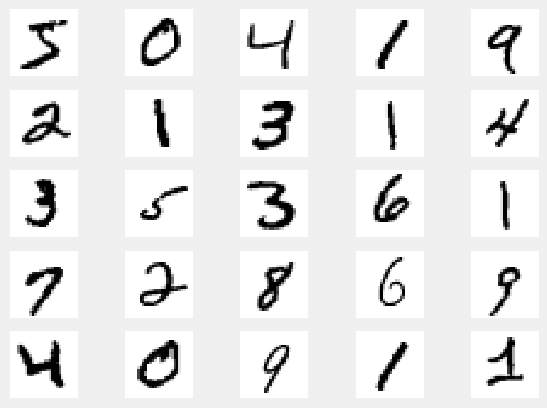

In [4]:
fig,ax = plt.subplots(5,5)
for i,axs in enumerate(ax.flat):
  axs.imshow(X_train[i],cmap='binary',interpolation = 'nearest')
  axs.set_xticks([])
  axs.set_yticks([])
  axs.axis('off')

In [5]:
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

In [6]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28, 28,1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

if X_train is None or y_train is None or X_test is None or y_test is None:
    raise ValueError("One of the datasets is not properly loaded.")

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

#one hot encoder for y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("y_train (one-hot) shape:", y_train.shape)

if len(y_train.shape) == 1:  # Check if y_train is not already one-hot encoded
    y_train = to_categorical(y_train, num_classes=10)

if len(y_test.shape) == 1:  # Check if y_test is not already one-hot encoded
    y_test = to_categorical(y_test, num_classes=10)

# Check shape of y_train to make sure it's correct
print("One-hot encoded y_train shape:", y_train.shape) 

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
y_train (one-hot) shape: (60000, 10)
One-hot encoded y_train shape: (60000, 10)


In [7]:
#create model

model = Sequential()
input_shape=(28,28,1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

 #Compile the model and check for issues
try:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model compiled successfully!")
except Exception as e:
    print("Error during model compilation:", e)

Model compiled successfully!


In [8]:
#create model

model = Sequential()
input_shape=(28,28,1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

 #Compile the model and check for issues
try:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model compiled successfully!")
except Exception as e:
    print("Error during model compilation:", e)

Model compiled successfully!


In [9]:
#create model

model = Sequential()
input_shape=(28,28,1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

 #Compile the model and check for issues
try:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model compiled successfully!")
except Exception as e:
    print("Error during model compilation:", e)

Model compiled successfully!


In [10]:
#fit the model
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 35ms/step - accuracy: 0.8830 - loss: 0.3701
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9744 - loss: 0.0859
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9806 - loss: 0.0639


In [11]:
#testify the validity

result = model.evaluate(X_test,y_test)
print('Accuracy : {} %'.format(round(result[1]*100,1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9858 - loss: 0.0428
Accuracy : 98.9 %
